# 14: 使用API下载数据和处理数据

## CSV文件格式

- CSV文件是纯文本格式的文件
- 第一行是表头，也就是列名，用逗号（也可以是其他符号）分隔每一列
- 从第二行开始是每一列的数据，用逗号分隔
- 在VSCode中安装Rainbow CSV, 使得CSV文件容易阅读

### 解析CSV文件头

In [3]:
from pathlib import Path
import csv

path = Path('./weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)

header_row = next(reader)

print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


### 打印文件头及其位置

In [4]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


### 提取并读取数据

In [5]:
# Extract high temperatures.
highs = []
for row in reader:
    high = int(row[4])
    highs.append(high)

print(highs)

[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


In [14]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### 绘制温度图

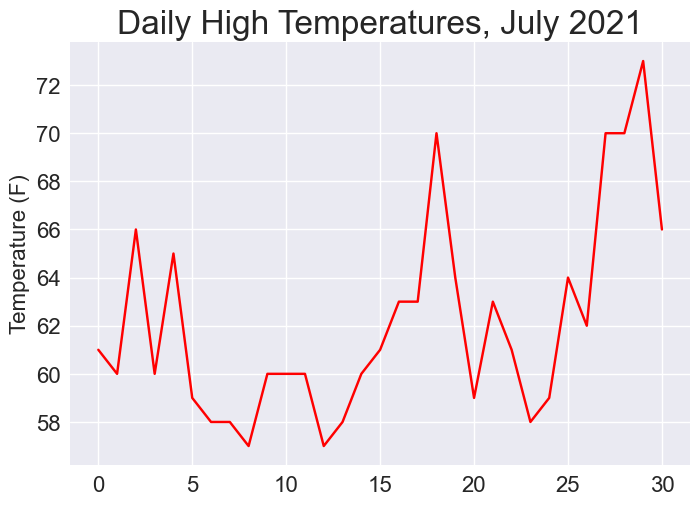

In [7]:
import matplotlib.pyplot as plt

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

### datetime模块

In [8]:
from datetime import datetime

first_date = datetime.strptime('2021-07-01', '%Y-%m-%d')
print(first_date)

2021-07-01 00:00:00


表16-1 `datetime`模块中设置日期和时间格式的参数

| 参数 | 含义 |
| :--- | :--- |
| `%A` | 星期的全称，如Monday |
| `%B` | 月份的全称，如January |
| `%m` | 用数字表示的月份(01~12) |
| `%d` | 用数字表示月份中的一天(01~31) |
| `%Y` | 四位数的年份，如2015 |
| `%y` | 两位数的年份，如15 |
| `%H` | 24小时制的小时数(00~23) |
| `%I` | 12小时制的小时数(01~12) |
| `%p` | am或pm |
| `%M` | 分钟数(00~59) |
| `%S` | 秒数(00~61) |

### 在图中添加日期

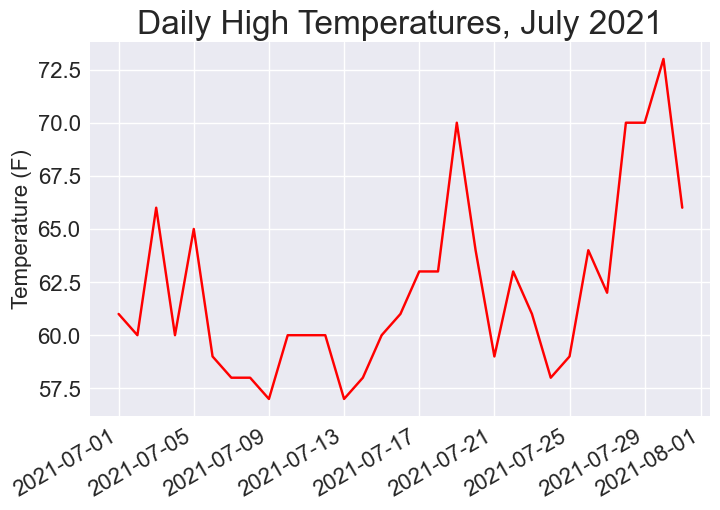

In [9]:
from datetime import datetime

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

### 涵盖更长的时间

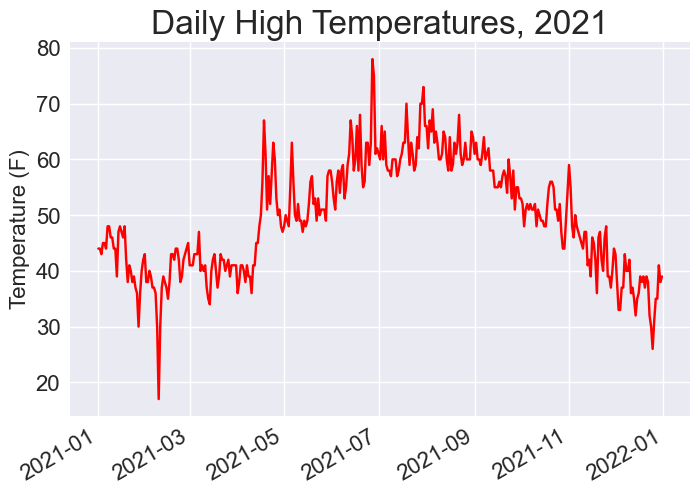

In [10]:
path = Path('./weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

### 再绘制一个数据系列

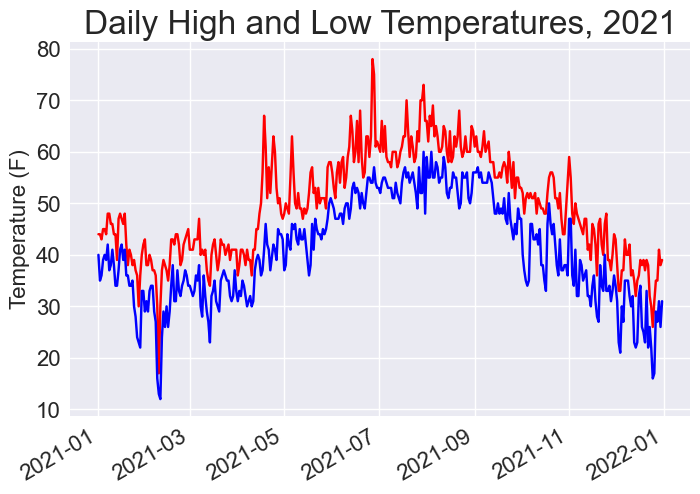

In [11]:
reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')

# Format plot.
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

### 在图中区域着色

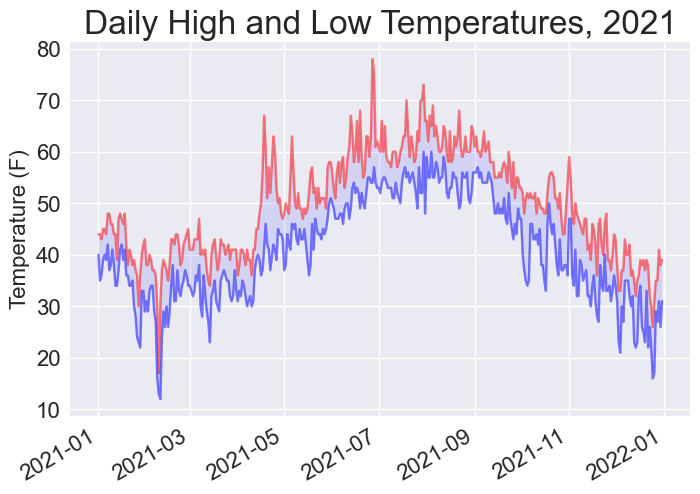

In [12]:
# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

### 错误检查

In [13]:
# 有时候读取的数据文件可能有数据缺失或者错误的情况

path = Path('./weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[3])
    low = int(row[4])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
    # try:
    #     high = int(row[3])
    #     low = int(row[4])
    # except ValueError:
    #     print(f"Missing data for {current_date}")
    # else:
    #     dates.append(current_date)
    #     highs.append(high)
    #     lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

ValueError: invalid literal for int() with base 10: ''

### 使用Pandas读取CSV文件

In [ ]:
import pandas as pd

weather_df = pd.read_csv('./weather_data/death_valley_2021_simple.csv')
weather_df[:5]

,STATION,NAME,DATE,TMAX,TMIN,TOBS
0,USC00042319,"DEATH VALLEY NATIONAL PARK, CA US",2021-01-01,71.0,51,56.0
1,USC00042319,"DEATH VALLEY NATIONAL PARK, CA US",2021-01-02,67.0,42,51.0
2,USC00042319,"DEATH VALLEY NATIONAL PARK, CA US",2021-01-03,66.0,41,49.0
3,USC00042319,"DEATH VALLEY NATIONAL PARK, CA US",2021-01-04,66.0,41,48.0
4,USC00042319,"DEATH VALLEY NATIONAL PARK, CA US",2021-01-05,70.0,40,52.0


In [ ]:
weather_df.columns

Index(['STATION', 'NAME', 'DATE', 'TMAX', 'TMIN', 'TOBS'], dtype='object')

In [ ]:
weather_df['TMAX'][:5]  # 不使用循环

0    71.0
1    67.0
2    66.0
3    66.0
4    70.0
Name: TMAX, dtype: float64

In [ ]:
weather_df['TDIFF'] =  weather_df['TMAX'] - weather_df['TMIN']
weather_df['TDIFF'][:5]

0    20.0
1    25.0
2    25.0
3    25.0
4    30.0
Name: TDIFF, dtype: float64

In [ ]:
weather_df.isna().any()

STATION    False
NAME       False
DATE       False
TMAX        True
TMIN       False
TOBS        True
TDIFF       True
dtype: bool

In [ ]:
df = weather_df.fillna(method='ffill')
df.isna().any()

STATION    False
NAME       False
DATE       False
TMAX       False
TMIN       False
TOBS       False
TDIFF      False
dtype: bool

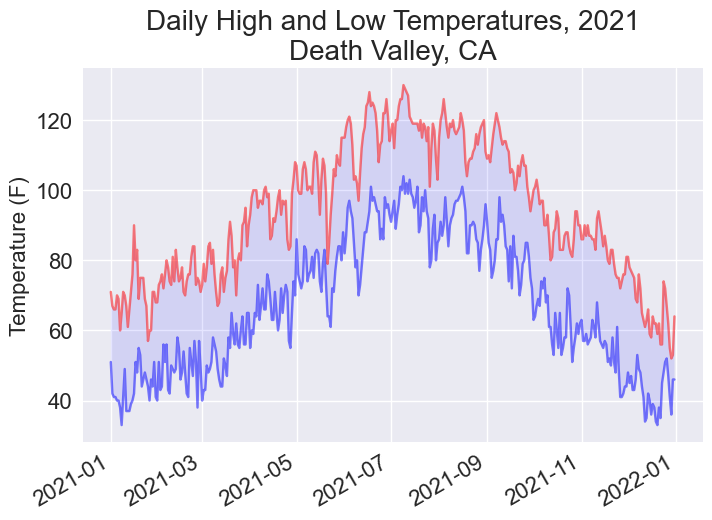

In [ ]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()

df['DATE'] = pd.to_datetime(df['DATE'])

ax.plot(df['DATE'], df['TMAX'], color='red', alpha=0.5)
ax.plot(df['DATE'], df['TMIN'], color='blue', alpha=0.5)
ax.fill_between(df['DATE'], df['TMAX'], df['TMIN'], facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

## 制作全球地震散点图：GeoJSON格式

### 查看地震数据

In [ ]:
from pathlib import Path
import json

# Read data as a string and convert to a Python object.
path = Path('./eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Create a more readable version of the data file.
path = Path('./eq_data/readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent=4)
path.write_text(readable_contents)

223652

### 创建地震数据列表

In [ ]:
# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']  # 一个列表，每个元素是一个字典
print(len(all_eq_dicts))

160


### 提取震级

In [ ]:
all_eq_dicts = all_eq_data['features']

mags = []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    mags.append(mag)

print(mags[:10])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]


### 提取位置数据

In [ ]:
mags, lons, lats = [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

print(mags[:10])
print(lons[:5])
print(lats[:5])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]
[-150.7585, -153.4716, -148.7531, -159.6267, -155.248336791992]
[61.7591, 59.3152, 63.1633, 54.5612, 18.7551670074463]


### 绘制地震散点图

|  API |  `scatter`() | `scatter_geo`() |
| :--- | :--- | :--- |
| 经度参数 | `x` | `lon` |
| 纬度参数 | `y` | `lat` |
| 投影参数 | --  | `projection` |

In [ ]:
import plotly.express as px

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, title=title)
fig.show()

### 设置地震散点图的样式

- 定制标记的尺寸
- 定制标记的颜色
- 其他渐变
- 添加悬停文本

In [ ]:
title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='blugrn',
        labels={'color':'Magnitude'},
        projection='natural earth',
        width=1200, height=800,
    )

fig.show()

In [ ]:
# 其他可用的渐变
print(px.colors.named_colorscales())

['aggrnyl', 'agsunset', 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'darkmint', 'electric', 'emrld', 'gnbu', 'greens', 'greys', 'hot', 'inferno', 'jet', 'magenta', 'magma', 'mint', 'orrd', 'oranges', 'oryel', 'peach', 'pinkyl', 'plasma', 'plotly3', 'pubu', 'pubugn', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdpu', 'redor', 'reds', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'turbo', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd', 'algae', 'amp', 'deep', 'dense', 'gray', 'haline', 'ice', 'matter', 'solar', 'speed', 'tempo', 'thermal', 'turbid', 'armyrose', 'brbg', 'earth', 'fall', 'geyser', 'prgn', 'piyg', 'picnic', 'portland', 'puor', 'rdgy', 'rdylbu', 'rdylgn', 'spectral', 'tealrose', 'temps', 'tropic', 'balance', 'curl', 'delta', 'oxy', 'edge', 'hsv', 'icefire', 'phase', 'twilight', 'mrybm', 'mygbm']


In [ ]:
mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    eq_titles.append(eq_title)

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'Magnitude'},
        projection='natural earth',
        hover_name=eq_titles,
        width=1200, height=800,
    )
fig.show()

### 使用Pandas读取数据

In [ ]:
import pandas as pd
from pathlib import Path
import json

# Read data as a string and convert to a Python object.
path = Path('eq_data/eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']  # 一个列表，每个元素是一个字典

# 将嵌套在列表中的嵌套的字典展开，得到一个二维的dataframe
df_flat = pd.json_normalize(all_eq_dicts)
df_flat[:5]

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak0224bju1jx,1.60,"27 km NNW of Susitna, Alaska",1649051836769,1649052020437,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",NaN,NaN,0.54,NaN,ml,earthquake,"M 1.6 - 27 km NNW of Susitna, Alaska",Point,"[-150.7585, 61.7591, 56.3]"
1,Feature,ak0224bjowco,1.60,"63 km SE of Pedro Bay, Alaska",1649050396662,1649050785063,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",NaN,NaN,0.16,NaN,ml,earthquake,"M 1.6 - 63 km SE of Pedro Bay, Alaska",Point,"[-153.4716, 59.3152, 97.9]"
2,Feature,ak0224bjnd7y,2.20,"27 km SSE of Cantwell, Alaska",1649049962786,1649050629179,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",NaN,NaN,0.53,NaN,ml,earthquake,"M 2.2 - 27 km SSE of Cantwell, Alaska",Point,"[-148.7531, 63.1633, 52.6]"
3,Feature,us7000gzhx,3.70,south of Alaska,1649049432877,1649051314040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,shakemap,",NaN,0.271,0.60,194.0,ml,earthquake,M 3.7 - south of Alaska,Point,"[-159.6267, 54.5612, 19.6]"
4,Feature,hv72972837,2.92,"49 km SE of Naalehu, Hawaii",1649048457870,1649051014040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,...,",origin,phase-data,",31.0,NaN,0.17,279.0,md,earthquake,"M 2.9 - 49 km SE of Naalehu, Hawaii",Point,"[-155.248336791992, 18.7551670074463, 8.689999..."


In [ ]:
df = df_flat.rename(columns={'properties.mag': 'mag', 
                            'properties.title': 'title'})
df[['mag', 'title']]

,mag,title
0,1.60,"M 1.6 - 27 km NNW of Susitna, Alaska"
1,1.60,"M 1.6 - 63 km SE of Pedro Bay, Alaska"
2,2.20,"M 2.2 - 27 km SSE of Cantwell, Alaska"
3,3.70,M 3.7 - south of Alaska
4,2.92,"M 2.9 - 49 km SE of Naalehu, Hawaii"
...,...,...
6354,1.30,"M 1.3 - 55 km NNE of Petersville, Alaska"
6355,2.05,"M 2.0 - 4 km S of Pāhala, Hawaii"
6356,1.62,"M 1.6 - 8km NE of San Simeon, CA"
6357,1.52,"M 1.5 - 4km ENE of Beaumont, CA"


In [ ]:
df_flat['geometry.coordinates'][:10]

0                           [-150.7585, 61.7591, 56.3]
1                           [-153.4716, 59.3152, 97.9]
2                           [-148.7531, 63.1633, 52.6]
3                           [-159.6267, 54.5612, 19.6]
4    [-155.248336791992, 18.7551670074463, 8.689999...
5                            [-149.173, 62.3994, 35.6]
6                            [22.0768, 36.3592, 35.27]
7                           [129.5079, -6.686, 149.73]
8                           [-150.5896, 62.9779, 90.2]
9                               [-145.9089, 63.671, 0]
Name: geometry.coordinates, dtype: object

In [ ]:
print(df_flat['geometry.coordinates'].apply(lambda x: x[0]))

0      -150.758500
1      -153.471600
2      -148.753100
3      -159.626700
4      -155.248337
           ...    
6354   -150.347000
6355   -155.473999
6356   -121.133333
6357   -116.936167
6358   -110.332333
Name: geometry.coordinates, Length: 6359, dtype: float64


In [ ]:
df['lon'] = df_flat['geometry.coordinates'].apply(lambda x: x[0])
df['lat'] = df_flat['geometry.coordinates'].apply(lambda x: x[1])
df = df[['mag', 'title', 'lon', 'lat']]
df

,mag,title,lon,lat
0,1.60,"M 1.6 - 27 km NNW of Susitna, Alaska",-150.758500,61.759100
1,1.60,"M 1.6 - 63 km SE of Pedro Bay, Alaska",-153.471600,59.315200
2,2.20,"M 2.2 - 27 km SSE of Cantwell, Alaska",-148.753100,63.163300
3,3.70,M 3.7 - south of Alaska,-159.626700,54.561200
4,2.92,"M 2.9 - 49 km SE of Naalehu, Hawaii",-155.248337,18.755167
...,...,...,...,...
6354,1.30,"M 1.3 - 55 km NNE of Petersville, Alaska",-150.347000,62.952200
6355,2.05,"M 2.0 - 4 km S of Pāhala, Hawaii",-155.473999,19.159334
6356,1.62,"M 1.6 - 8km NE of San Simeon, CA",-121.133333,35.693333
6357,1.52,"M 1.5 - 4km ENE of Beaumont, CA",-116.936167,33.951667


In [ ]:
import plotly.express as px

fig = px.scatter_geo(
    df,
    lon='lon',
    lat='lat',
    width=1200,
    height=800,
    title='全球地震散点图',
    size='mag',
    size_max=10,
    color='mag',
    color_continuous_scale='Viridis',
    labels={'color':'Magnitude'},
    projection='natural earth',
    hover_name='title',    
)
fig.show()

## 使用API

### 安装Requests

In [ ]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 使用API调用请求数据

In [ ]:
import requests

url = (
    "https://api.github.com/search/repositories"
    + "?q=language:python+sort:stars+stars:>10000"
)
headers = {"Accept": "application/vnd.github.v3+json"}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# Convert the response object to a dictionary.
response_dict = r.json()

# Process results.
print(response_dict.keys())

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


使用`httpx`请求数据

- `httpx`是一个更现代化的`requests`库
- 能够支持异步和同步的操作
- 安装：`pip install httpx`

In [ ]:
%pip install httpx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import httpx

url = (
    "https://api.github.com/search/repositories"
    + "?q=language:python+sort:stars+stars:>10000"
)
headers = {"Accept": "application/vnd.github.v3+json"}
r = httpx.get(url, headers=headers, timeout=6.1)
print(f"Status code: {r.status_code}")

# Convert the response object to a dictionary.
response_dict = r.json()

# Process results.
print(response_dict.keys())

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


### 处理响应字典

In [ ]:
# Convert the response object to a dictionary.
response_dict = r.json()

print(f"Total repositories: {response_dict['total_count']}")
print(f"Complete results: {not response_dict['incomplete_results']}")

# Explore information about the repositories.
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

# Examine the first repository.
repo_dict = repo_dicts[0]
print(f"\nKeys: {len(repo_dict)}")
for key in sorted(repo_dict.keys()):
    print(key)

Total repositories: 421
Complete results: True
Repositories returned: 30

Keys: 80
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_at
url
visibility
watchers
watchers_count
web_commit_signoff_r

In [ ]:
# 第一个仓库的数据
repo_dict = repo_dicts[0]

print("\nSelected information about first repository:")
print(f"Name: {repo_dict['name']}")
print(f"Owner: {repo_dict['owner']['login']}")
print(f"Stars: {repo_dict['stargazers_count']}")
print(f"Repository: {repo_dict['html_url']}")
print(f"Created: {repo_dict['created_at']}")
print(f"Updated: {repo_dict['updated_at']}")
print(f"Description: {repo_dict['description']}")


Selected information about first repository:
Name: public-apis
Owner: public-apis
Stars: 268609
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2023-11-15T06:11:04Z
Description: A collective list of free APIs


### 概述最受欢迎的仓库

In [ ]:
# 探索仓库包含的信息
print(f"Repositories returned: {len(repo_dicts)}")

print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print("\nSelected information about first repository:")
    print(f"Name: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}")
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Created: {repo_dict['created_at']}")
    print(f"Updated: {repo_dict['updated_at']}")
    print(f"Description: {repo_dict['description']}")

Repositories returned: 30

Selected information about each repository:

Selected information about first repository:
Name: public-apis
Owner: public-apis
Stars: 268609
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2023-11-15T06:11:04Z
Description: A collective list of free APIs

Selected information about first repository:
Name: system-design-primer
Owner: donnemartin
Stars: 235277
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2023-11-15T06:19:12Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Selected information about first repository:
Name: awesome-python
Owner: vinta
Stars: 186676
Repository: https://github.com/vinta/awesome-python
Created: 2014-06-27T21:00:06Z
Updated: 2023-11-15T06:14:01Z
Description: A curated list of awesome Python frameworks, libraries, software and resources

Selected information abou

## 使用Plotly可视化仓库

In [ ]:
import plotly.express as px

repo_names, stars = [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

# Make visualization.
fig = px.bar(x=repo_names, y=stars)
fig.show()

### 设置图形的样式

In [ ]:
# Make visualization.
title = "Most-Starred Python Projects on GitHub"
labels = {'x': 'Repository', 'y': 'Stars'}
fig = px.bar(x=repo_names, y=stars, title=title, labels=labels)

fig.update_layout(title_font_size=28, xaxis_title_font_size=20,
        yaxis_title_font_size=20)

fig.show()

### 添加定制工具提示

In [ ]:
repo_names, stars, hover_texts = [], [], []
for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

    # Build hover texts.
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

# Make visualization.
title = "Most-Starred Python Projects on GitHub"
labels = {'x': 'Repository', 'y': 'Stars'}
fig = px.bar(x=repo_names, y=stars, title=title, labels=labels,
        hover_name=hover_texts)

fig.update_layout(title_font_size=28, xaxis_title_font_size=20,
        yaxis_title_font_size=20)

fig.show()

### 添加可单击的链接

In [ ]:
repo_links, stars, hover_texts = [], [], []
for repo_dict in repo_dicts:
    # Turn repo names into active links.
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)

    stars.append(repo_dict['stargazers_count'])

    # Build hover texts.
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

# Make visualization.
title = "Most-Starred Python Projects on GitHub"
labels = {'x': 'Repository', 'y': 'Stars'}
fig = px.bar(x=repo_links, y=stars, title=title, labels=labels,
        hover_name=hover_texts)

fig.update_layout(title_font_size=28, xaxis_title_font_size=20,
        yaxis_title_font_size=20)

# 定制标记的颜色
fig.update_traces(marker_color='SteelBlue', marker_opacity=0.6)

fig.show()

## 公开的API

公开免费API集合：[Public-APIs](https://github.com/public-apis/public-apis)

In [ ]:
import httpx

url = "https://api.chess.com/pub/player/erik/stats"

r = httpx.get(url, timeout=6.1)
print(f"Status code: {r.status_code}")

# Convert the response object to a dictionary.
response_dict = r.json()

# Process results.
response_dict


Status code: 200


{'chess_daily': {'last': {'rating': 1517, 'date': 1700484362, 'rd': 24},
  'best': {'rating': 2065,
   'date': 1256228875,
   'game': 'https://www.chess.com/game/daily/26087202'},
  'record': {'win': 2814,
   'loss': 1816,
   'draw': 330,
   'time_per_move': 13578,
   'timeout_percent': 0},
  'tournament': {'points': 24,
   'withdraw': 1,
   'count': 1,
   'highest_finish': 1}},
 'chess960_daily': {'last': {'rating': 1384, 'date': 1697901745, 'rd': 79},
  'best': {'rating': 1779,
   'date': 1466772304,
   'game': 'https://www.chess.com/game/daily/155362414'},
  'record': {'win': 305,
   'loss': 188,
   'draw': 26,
   'time_per_move': 13578,
   'timeout_percent': 0},
  'tournament': {'points': 24,
   'withdraw': 1,
   'count': 1,
   'highest_finish': 1}},
 'chess_rapid': {'last': {'rating': 1904, 'date': 1678009742, 'rd': 80},
  'best': {'rating': 1904,
   'date': 1647475349,
   'game': 'https://www.chess.com/game/live/41213397731'},
  'record': {'win': 27, 'loss': 11, 'draw': 1}},
 'ch